<a href="https://colab.research.google.com/github/InduwaraGayashan001/PyTorch/blob/main/Pre_Trained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!pip install torchvision -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.8 MB/s eta 0:00:00


In [2]:
# Import torch and torchvision modules
from torchvision import models # To load any classification model.
from PIL import Image, ImageDraw, ImageFont # To read images from disk.
from torchvision import transforms # To apply PyTorch transformations

import os
import requests # To download file.
import cv2 # For annotating images.
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt # To visualize images.
from zipfile import ZipFile
from urllib.request import urlretrieve

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/8srx6xdjt9me3do/TF-Keras-Bootcamp-NB07-assets.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "PyTorch-Bootcamp-NB07-assets.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

# Preproces the Inputs

In [5]:
tranform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [6]:
!wget -q  'https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt' -O'imagenet_classes.txt'


# Instantiate the model

In [7]:
model = models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 53.9MB/s]


In [8]:
model.eval()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Forwad Pass

In [9]:
img = Image.open("images/baseball-player.png")
img_t = tranform(img)
batch_t = torch.unsqueeze(img_t, 0)
out = model(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [10]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [11]:
_ , indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('baseball', 69.17581176757812),
 ('ballplayer, baseball player', 30.808670043945312),
 ('racket, racquet', 0.010133962146937847),
 ('tennis ball', 0.0008962747524492443),
 ('soccer ball', 0.0005332764703780413)]

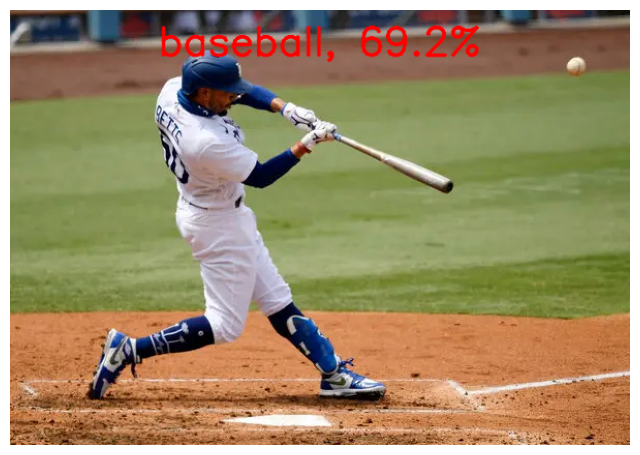

In [13]:
def visualize_predictions(img, class_name, conf):
    """
    Function to visualize results:
    :param img: PIL Image
    :param class_name: Class name string
    :param conf: Prediction confidence string
    """
    bgr_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img_h, img_w = bgr_img.shape[:2]

    # Define font scale and thickness based on image height
    font_scale = max(0.003 * img_h, 0.5)
    thickness = max(1, int(img_h / 200))

    text = f"{class_name}, {conf}%"

    # Calculate text size to center it
    (text_w, text_h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
    text_x = (img_w - text_w) // 2
    text_y = (img_h + text_h) // 10

    cv2.putText(
        img=bgr_img,
        org=(text_x, text_y),
        text=text,
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        color=(0, 0, 255),
        fontScale=font_scale,
        thickness=thickness,
        lineType=cv2.LINE_AA
    )

    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.show()

class_name = labels[indices[0][0]]
conf = f"{percentage[indices[0][0]].item():.1f}"
visualize_predictions(img, class_name, conf)

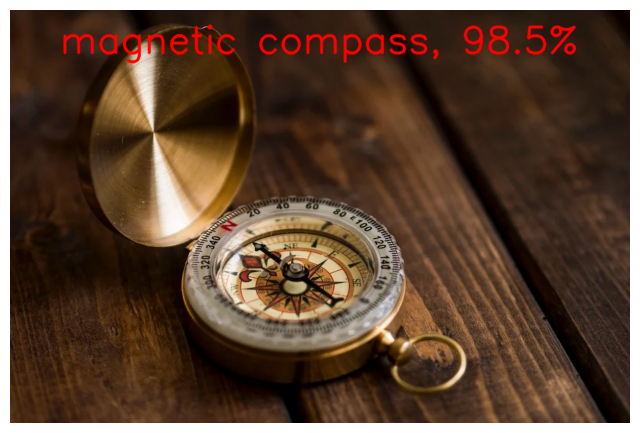

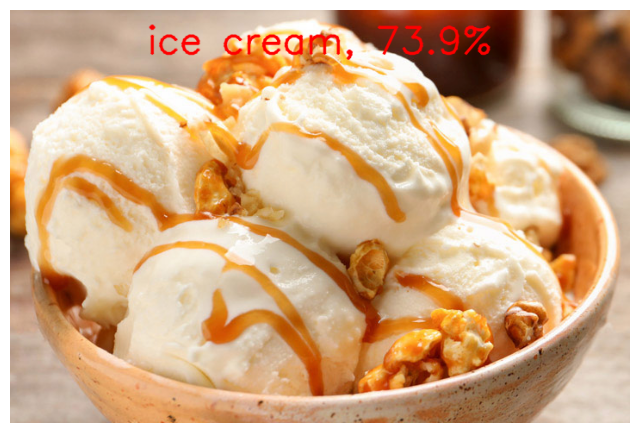

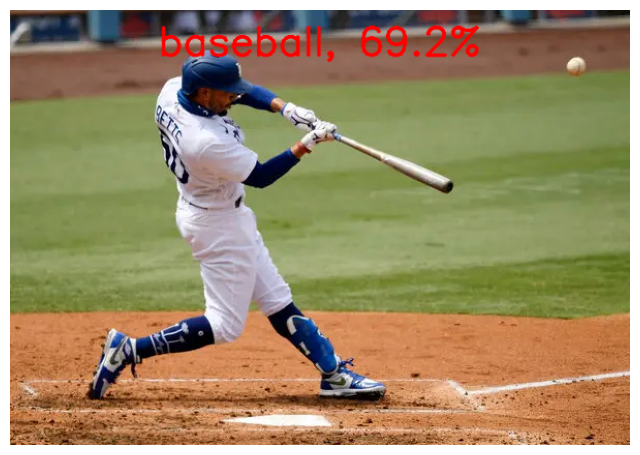

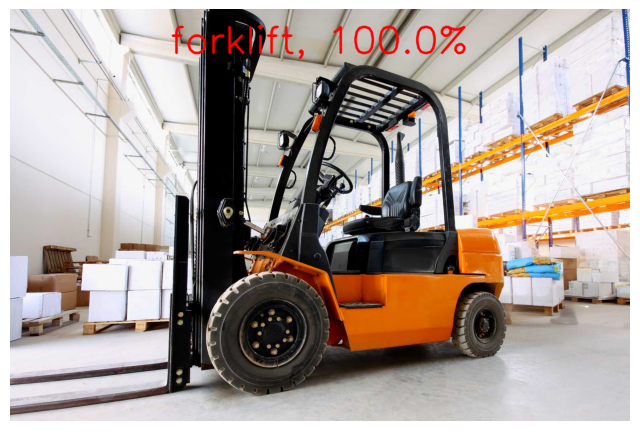

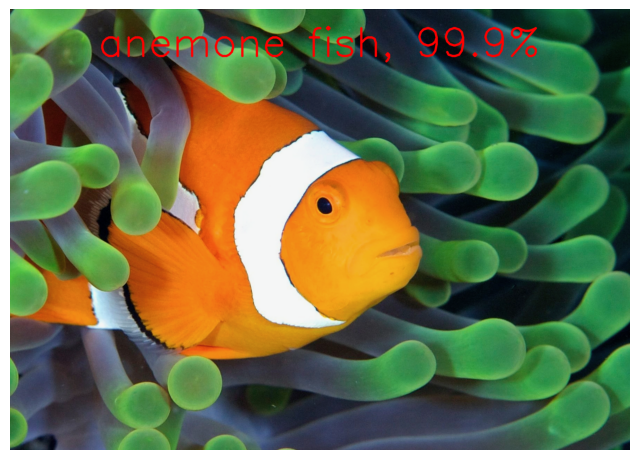

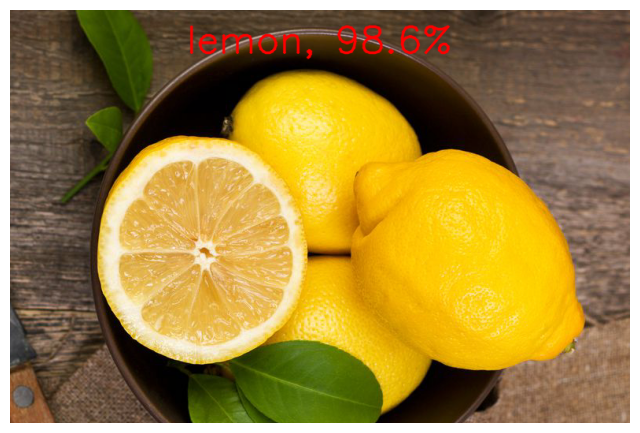

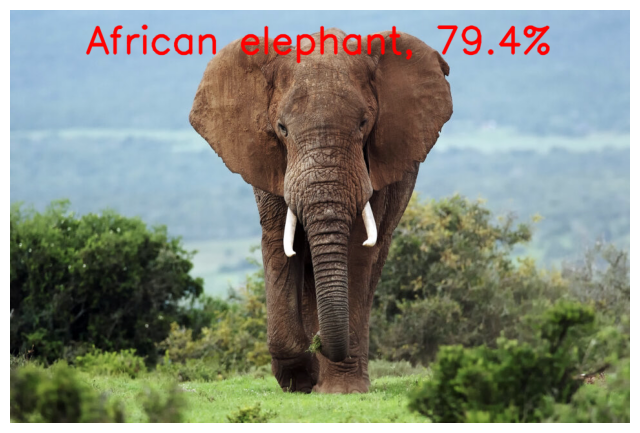

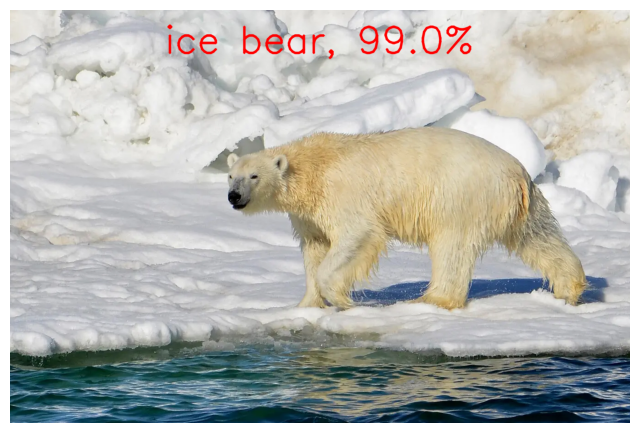

In [15]:
def prediction(image_path, model):

  model.eval()
  img = Image.open(image_path)
  img_t = tranform(img)
  batch_t = torch.unsqueeze(img_t, 0)
  out = model(batch_t)

  _, indices = torch.sort(out, descending=True)
  percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
  [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

  class_name = labels[indices[0][0]].split(',')[0]
  conf = f"{percentage[indices[0][0]].item():.1f}"
  visualize_predictions(img, class_name, conf)

for img_path in os.listdir('images'):
  img_path = os.path.join("images", img_path)
  prediction(img_path, model)
